In [5]:
import torch
import os
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda:0


In [6]:
import torch
from diffusers import StableDiffusionInpaintPipeline

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipe.to(DEVICE)

vae/diffusion_pytorch_model.safetensors not found
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00, 17.79it/s]An error occurred while trying to fetch /home/lee/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/lee/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/lee/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/lee/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/unet.
Defaulting t

StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "runwayml/stable-diffusion-inpainting",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [8]:
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = '../weights/sam_vit_h_4b8939.pth'
print(CHECKPOINT_PATH, "; exist;", os.path.isfile(CHECKPOINT_PATH))

./weights/sam_vit_h_4b8939.pth ; exist; True


In [9]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [10]:
import cv2

image_bgr = cv2.imread('../images/testImage.png')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
original_image = image_bgr

print(image_rgb.shape)



(490, 502, 3)


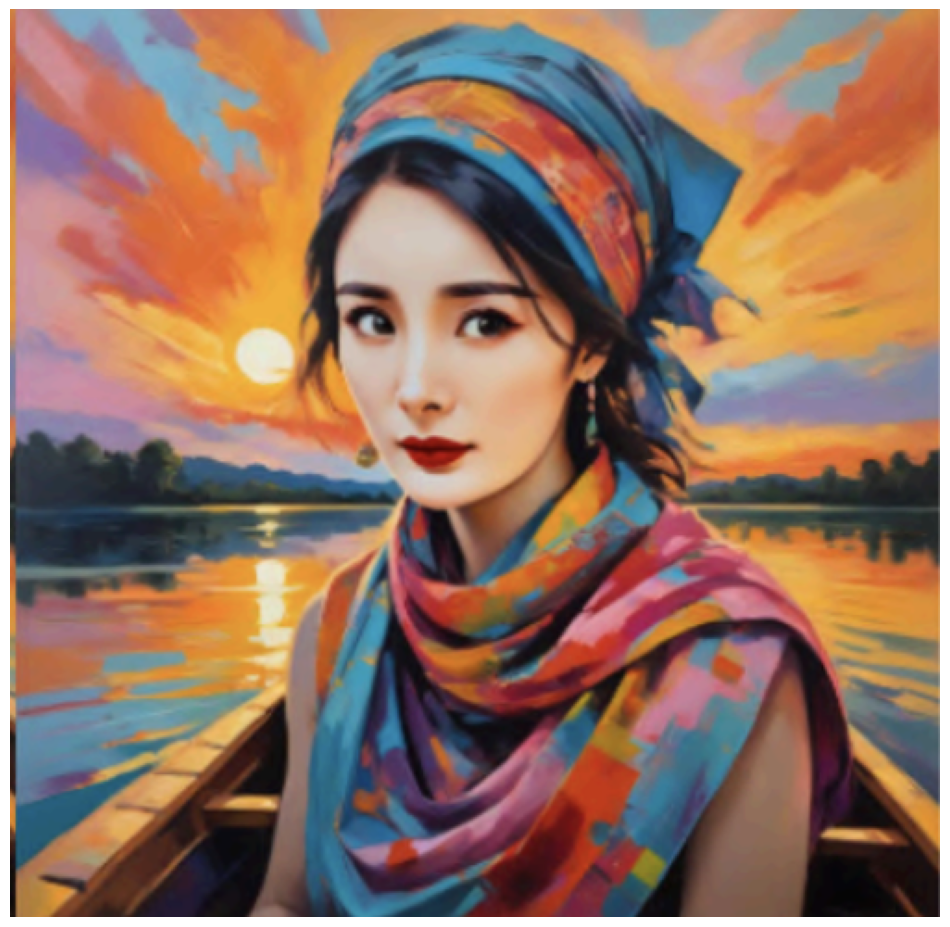

In [11]:
import supervision as sv

sv.plot_image(image_bgr)

In [12]:
mask_generator = SamAutomaticMaskGenerator(sam)
result = mask_generator.generate(image_rgb)
print(result[0].keys())
print(len(result))

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
52


In [13]:
bboxes = []
points = []
segmentations = []
areas = []

for mask in result:
    bboxes.append(mask['bbox'])
    points.append(mask['point_coords'])
    segmentations.append(mask['segmentation'])
    areas.append(mask['area'])
    print(mask['bbox'])

[131, 91, 301, 397]
[168, 8, 225, 227]
[122, 172, 30, 30]
[4, 408, 70, 54]
[175, 91, 145, 216]
[157, 345, 275, 143]
[159, 239, 294, 249]
[0, 0, 501, 461]
[362, 345, 70, 143]
[340, 0, 42, 20]
[144, 0, 28, 23]
[3, 372, 122, 90]
[147, 91, 174, 396]
[370, 181, 130, 42]
[22, 0, 112, 88]
[131, 318, 36, 170]
[104, 424, 41, 17]
[418, 24, 43, 31]
[367, 221, 133, 34]
[68, 442, 73, 47]
[396, 1, 103, 115]
[366, 238, 135, 29]
[208, 230, 41, 18]
[3, 228, 206, 40]
[72, 0, 28, 20]
[203, 447, 16, 16]
[347, 55, 46, 71]
[3, 228, 206, 65]
[453, 387, 48, 75]
[132, 297, 16, 35]
[186, 234, 12, 13]
[4, 268, 199, 192]
[67, 232, 25, 31]
[379, 347, 16, 16]
[57, 412, 42, 20]
[366, 185, 134, 70]
[339, 452, 91, 37]
[4, 363, 144, 125]
[165, 292, 32, 80]
[427, 3, 45, 30]
[130, 318, 249, 170]
[79, 396, 34, 16]
[346, 456, 136, 33]
[429, 456, 53, 33]
[430, 389, 71, 100]
[99, 364, 49, 34]
[371, 268, 130, 156]
[4, 2, 200, 459]
[438, 246, 8, 16]
[16, 459, 30, 16]
[436, 441, 49, 16]
[339, 453, 24, 36]


In [14]:
# sort all segmetation and their bbox and point coordinates
segmentations = [segment['segmentation'] for segment in sorted(result, key=lambda x: x['area'], reverse=True)]
bboxes = [bbox['bbox'] for bbox in sorted(result, key=lambda x: x['area'], reverse=True)]
points = [point['point_coords'] for point in sorted(result, key=lambda x: x['area'], reverse=True)]

print(bboxes)
print(points)

print(len(segmentations))


[[0, 0, 501, 461], [159, 239, 294, 249], [131, 91, 301, 397], [4, 268, 199, 192], [4, 2, 200, 459], [168, 8, 225, 227], [147, 91, 174, 396], [175, 91, 145, 216], [371, 268, 130, 156], [4, 363, 144, 125], [157, 345, 275, 143], [362, 345, 70, 143], [3, 228, 206, 65], [396, 1, 103, 115], [3, 228, 206, 40], [430, 389, 71, 100], [370, 181, 130, 42], [22, 0, 112, 88], [367, 221, 133, 34], [366, 185, 134, 70], [131, 318, 36, 170], [130, 318, 249, 170], [366, 238, 135, 29], [68, 442, 73, 47], [347, 55, 46, 71], [453, 387, 48, 75], [346, 456, 136, 33], [429, 456, 53, 33], [3, 372, 122, 90], [4, 408, 70, 54], [165, 292, 32, 80], [122, 172, 30, 30], [418, 24, 43, 31], [436, 441, 49, 16], [104, 424, 41, 17], [340, 0, 42, 20], [67, 232, 25, 31], [99, 364, 49, 34], [427, 3, 45, 30], [57, 412, 42, 20], [132, 297, 16, 35], [208, 230, 41, 18], [339, 452, 91, 37], [339, 453, 24, 36], [144, 0, 28, 23], [79, 396, 34, 16], [72, 0, 28, 20], [16, 459, 30, 16], [203, 447, 16, 16], [379, 347, 16, 16], [186, 23

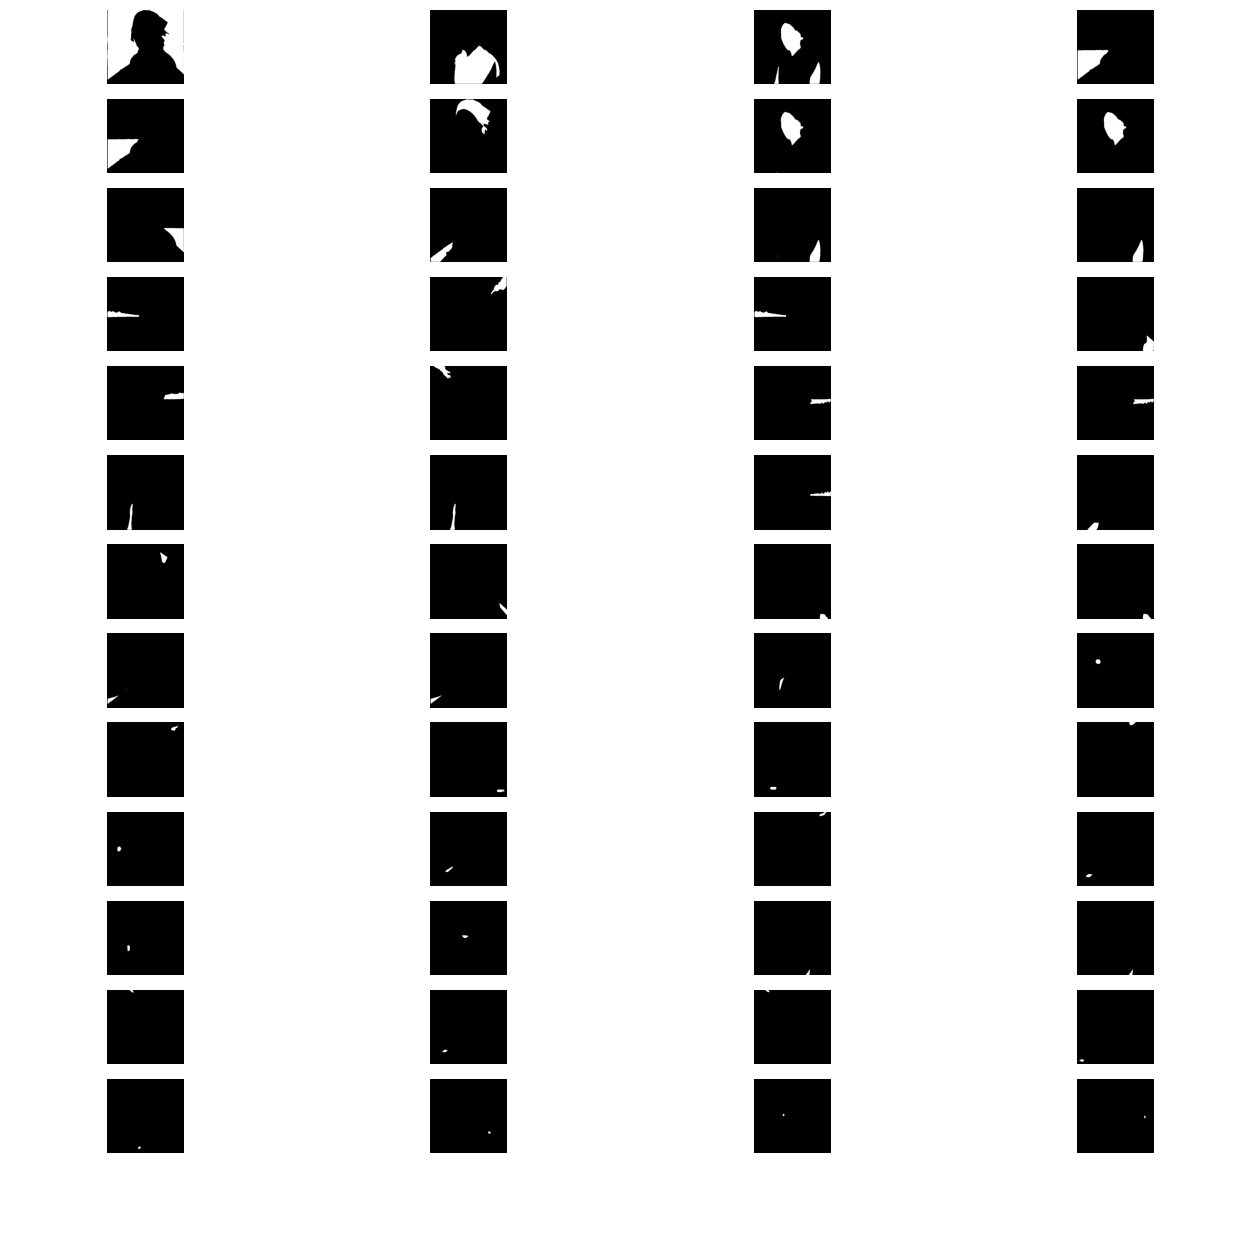

In [15]:
#draw all mask in a grid
sv.plot_images_grid(
    images=segmentations,
    grid_size=(int(len(segmentations)/4+1),4),
    size=(16,16)
)

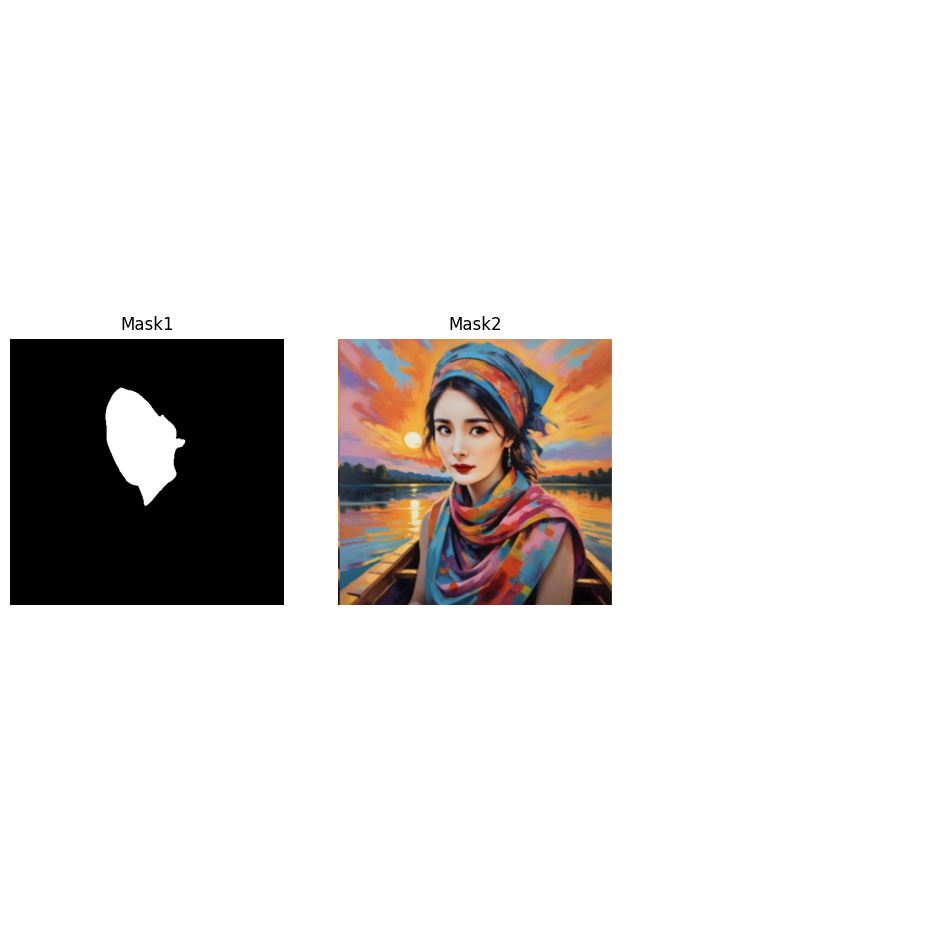

In [16]:
#draw large or small mask and compare with original image
sv.plot_images_grid(
    images=[segmentations[7], image_bgr],
    grid_size=(1,3),
    titles=['Mask1', 'Mask2', 'Original Image']
)

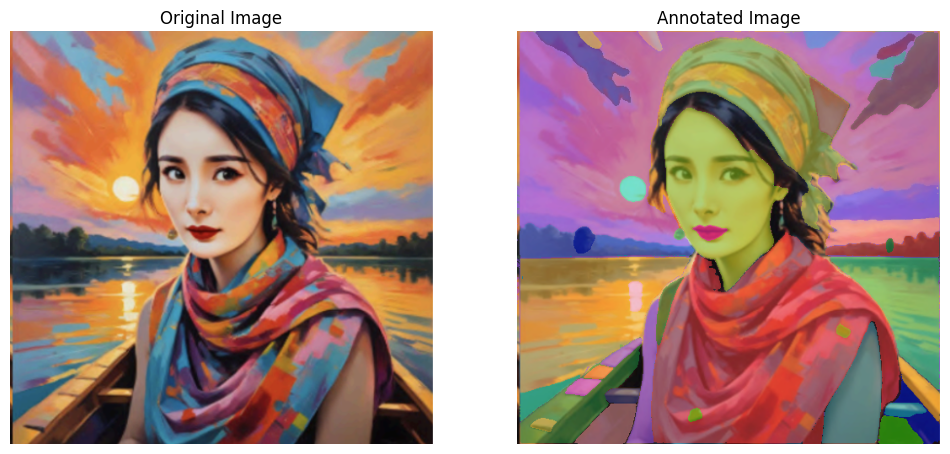

In [17]:
import numpy as np
# initialize mask & box annotator
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
# box_annotator = sv.BoxAnnotator(color=sv.Color.BLUE)

# for automatic mask generator for all segmented parts of the image
detections = sv.Detections.from_sam(result)

# for displaying largest mask

# annotated_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections)
annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1,2),
    titles=['Original Image', 'Annotated Image']
)

In [18]:
segment_predictor=SamPredictor(sam)
segment_predictor.set_image(image_rgb)

1


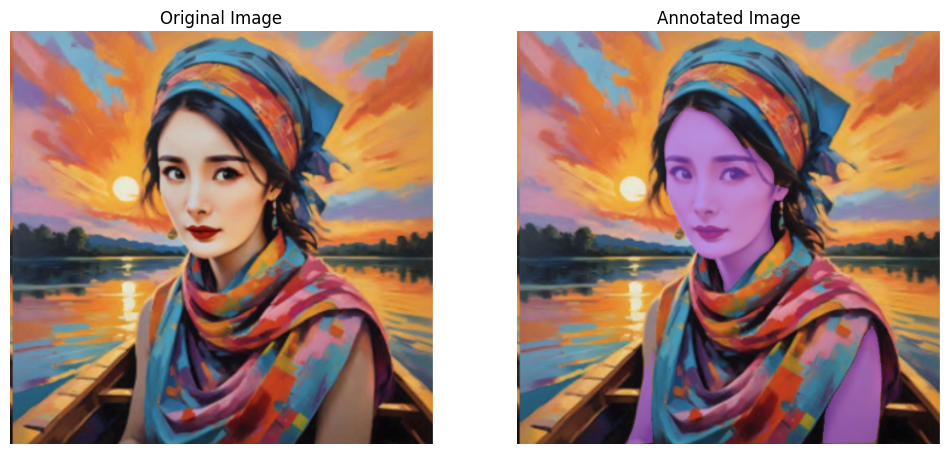

In [19]:
# input_point = np.array(points[7])
input_point = np.array([[200,200]])
input_label = np.array([1])

masks_by_point, scores, logits = segment_predictor.predict(
    point_coords = input_point,
    point_labels = input_label,
    multimask_output = False
)

print(len(masks_by_point))

# initialize mask & box annotator
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
# box_annotator = sv.BoxAnnotator(color=sv.Color.BLUE)

# for automatic mask generator for all segmented parts of the image
detections = sv.Detections(
    xyxy = sv.mask_to_xyxy(masks=masks_by_point),
    mask = masks_by_point
)
# for displaying largest mask

# annotated_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections)
annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1,2),
    titles=['Original Image', 'Annotated Image']
)

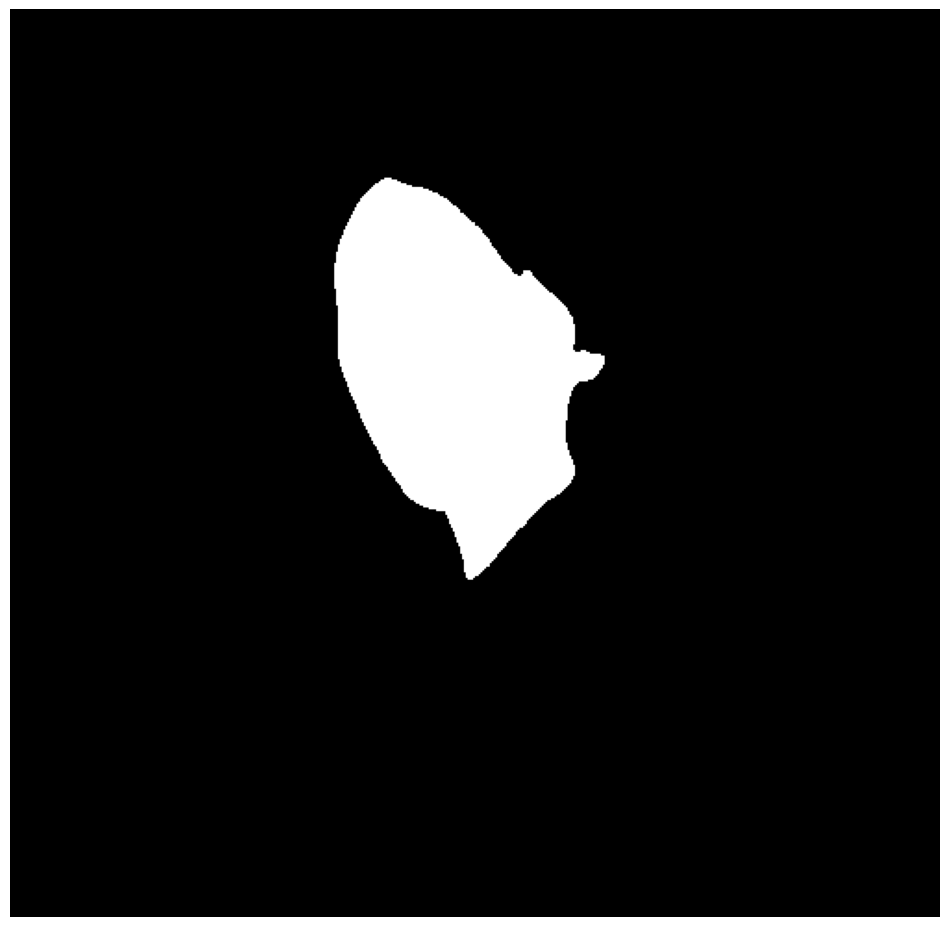

In [20]:
sv.plot_image(segmentations[7])

In [21]:
segmentations[7]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [22]:
seg = np.copy(segmentations[7])

seg = np.logical_not(seg)
seg

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [23]:
import matplotlib.pyplot as plt

plt.imsave("../images/face_mask_image.jpg", segmentations[7], cmap='gray')
plt.imsave("../images/reverse_mask_image.jpg", seg, cmap='gray')

: 